<div align="center">
<img src="https://raw.githubusercontent.com/kabianca/vocacao-analitica/main/MicrosoftTeams-image.png" width="300"/>
</div>

# Certifica

A Certifica é uma instituição de ensino inovadora que oferece cursos online, além de
programas presenciais e híbridos voltados à preparação de estudantes que buscam
alcançar certificações tecnológicas, tais como Azure e AWS. Em um ambiente de
ensino inovador, a Certifica contribui com a consolidação e troca de conhecimento
entre seus alunos.

> Fonte da base de dados: [Students Performance in Exams](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)

**Equipe:** Diego, Isabela Garcia, Karla e Rodrigo Pavloff.

## Importação de bibliotecas e Dataset

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = spark.read.csv("/FileStore/tables/StudentsPerformance.csv", header=True, sep=",")
df = df.toPandas()

## Análise Exploratória

In [0]:
# Substituindo female e male por feminino e masculino
df.loc[df.gender == 'female', 'gender'] = 'feminino'
df.loc[df.gender == 'male', 'gender'] = 'masculino'

### Renomeando colunas

In [0]:
df = df.astype({'math score':int, 'reading score':int, 'writing score':int})
df.rename(columns={'race/ethnicity':'race', 'parental level of education':'parenteral_education','test preparation course':'preparation_course',
                  'math score':'math_score', 'reading score':'reading_score', 'writing score':'writing_score'}, inplace=True)

In [0]:
df.head()

,gender,race,parenteral_education,lunch,preparation_course,math_score,reading_score,writing_score
0,feminino,group B,bachelor's degree,standard,none,72,72,74
1,feminino,group C,some college,standard,completed,69,90,88
2,feminino,group B,master's degree,standard,none,90,95,93
3,masculino,group A,associate's degree,free/reduced,none,47,57,44
4,masculino,group C,some college,standard,none,76,78,75


In [0]:
# Verificando o numero de linhas e colunas:
df.shape

Out[50]: (1000, 8)

In [0]:
# Visão geral sobre o tipo de dados de cada coluna:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   gender                1000 non-null   object
 1   race                  1000 non-null   object
 2   parenteral_education  1000 non-null   object
 3   lunch                 1000 non-null   object
 4   preparation_course    1000 non-null   object
 5   math_score            1000 non-null   int64 
 6   reading_score         1000 non-null   int64 
 7   writing_score         1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [0]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Obtendo distribuição

In [0]:
# Contagem de indivíduos por genero:
print(df['gender'].value_counts())

feminino     518
masculino    482
Name: gender, dtype: int64


In [0]:
# Porcentagem de indivíduos por gênero:
woman = df['gender'].value_counts(normalize=True)[0] * 100
man = df['gender'].value_counts(normalize=True)[1] * 100
print(f"Porcentagem de mulheres {round(woman, 1)}%")
print(f"Porcentagem de homens {round(man, 1)}%")

Porcentagem de mulheres 51.8%
Porcentagem de homens 48.2%


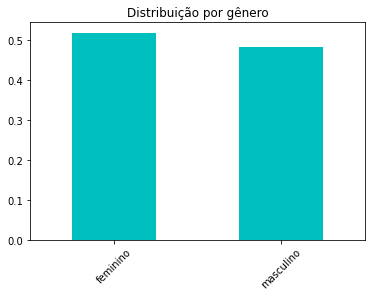

In [0]:
# Expondo em gráficos a distribuição por gênero:
df['gender'].value_counts(normalize=True).plot(kind="bar", title='Distribuição por gênero', rot='45', color='c');

In [0]:
# Quantificando grupos étnicos
print(df['race'].value_counts())

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race, dtype: int64


In [0]:
# Porcentagem de individuos por grupo étnico:
lista = list(df.race.value_counts(normalize=True)*100)
nomes = list(df.race.value_counts().index)

for i in range(len(nomes)):
    print(nomes[i],':',round(lista[i],1),'%')

group C : 31.9 %
group D : 26.2 %
group B : 19.0 %
group E : 14.0 %
group A : 8.9 %


In [0]:
# Quantificando os tipos de formações de pais de alunos:
print(df['parenteral_education'].value_counts())

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parenteral_education, dtype: int64


In [0]:
# Porcentagem de cada formação na base de dados:
lista = list(df.parenteral_education.value_counts(normalize=True)*100)
nomes = list(df.parenteral_education.value_counts().index)

for i in range(len(nomes)):
    print(nomes[i],':',round(lista[i],1),'%')

some college : 22.6 %
associate's degree : 22.2 %
high school : 19.6 %
some high school : 17.9 %
bachelor's degree : 11.8 %
master's degree : 5.9 %


In [0]:
# Verificando a diferença numérica entre quem pagou ou não pelo cursinho
print(df['lunch'].value_counts())

standard        645
free/reduced    355
Name: lunch, dtype: int64


In [0]:
# Porcentagem da diferença entre quem pagou ou não pelo cursinho:
lista = list(df.lunch.value_counts(normalize=True)*100)
nomes = list(df.lunch.value_counts().index)

for i in range(len(nomes)):
    print(nomes[i],':',round(lista[i],1),'%')

standard : 64.5 %
free/reduced : 35.5 %


### Criando classes de Score e distribuindo por genero

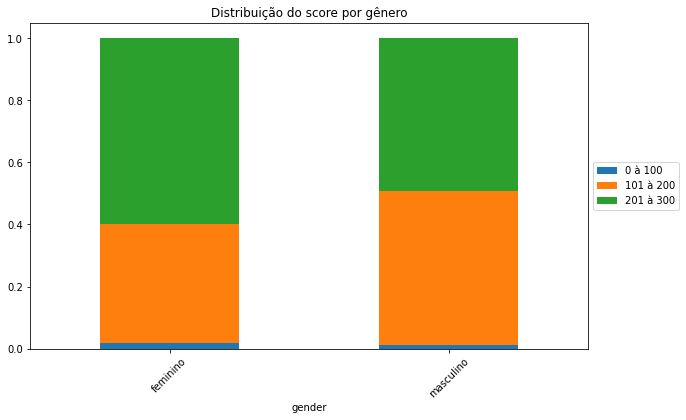

In [0]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
 
classes = [0,100,200,300]
labels  = ['0 à 100', '101 à 200', '201 à 300']
df['score'] = pd.cut(df['total_score'], classes, labels=labels, include_lowest=True)
pd.crosstab(df['gender'], df['score'], normalize='index').plot(kind='bar', stacked=True, figsize=(10,6), title='Distribuição do score por gênero', rot='45')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

In [0]:
# Quantificando indivíduos entre as classes anteriormente criadas e agrupando-as por gênero:
pd.crosstab(df['gender'], df['score'], normalize='index')

score,0 à 100,101 à 200,201 à 300
gender,,,
feminino,0.017375,0.384170,0.598456
masculino,0.012448,0.493776,0.493776


### Distribuição por grupo racial

#### Dicionário de dados da coluna gender/ethnicity:
* Group A - White - British
* Group B - White - Irish
* Group C - White - Any other White background
* Group D - Mixed - White and Black Caribbean
* Group E - Mixed - White and Black African

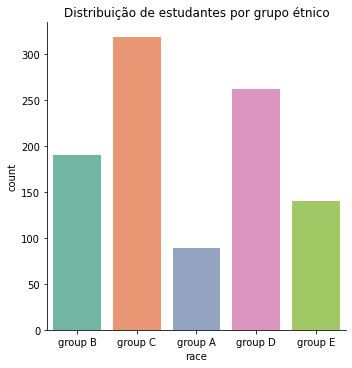

In [0]:
sns.catplot(x='race', kind='count', palette='Set2', data=df).set(title='Distribuição de estudantes por grupo étnico');

In [0]:
# Criando lista de matérias
materias = ['preparation_course', 'math_score', 'reading_score', 'writing_score']

### Verificando a distribuição das notas por matéria

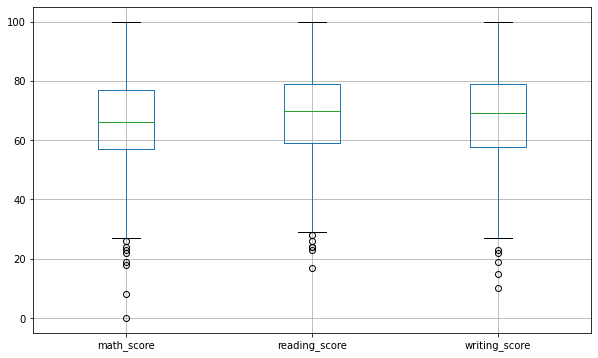

In [0]:
# Verificação das notas de cada matéria:
df[materias].boxplot(grid=True, figsize=(10,6));

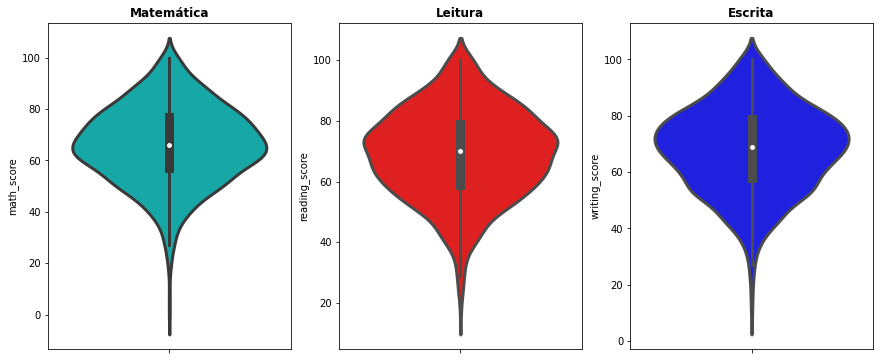

In [0]:
# Plotando o mesmo gráfico acima em formato violino:
plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)

plt.title('Matemática',fontweight='bold')
sns.violinplot(y='math_score',data=df,color='c',linewidth=3)
plt.subplot(1, 4, 2)

plt.title('Leitura',fontweight='bold')
sns.violinplot(y='reading_score',data=df,color='r',linewidth=3)
plt.subplot(1, 4, 3)

plt.title('Escrita',fontweight='bold')
sns.violinplot(y='writing_score',data=df,color='b',linewidth=3)
plt.show()

### Verificando a distribuição das notas de matemática por genero e se fez cursinho ou não

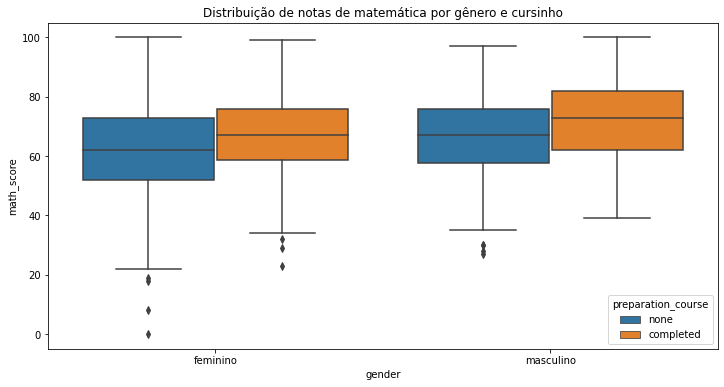

In [0]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['gender'], y=df['math_score'].astype(float), hue=df['preparation_course']).set(title='Distribuição de notas de matemática por gênero e cursinho');

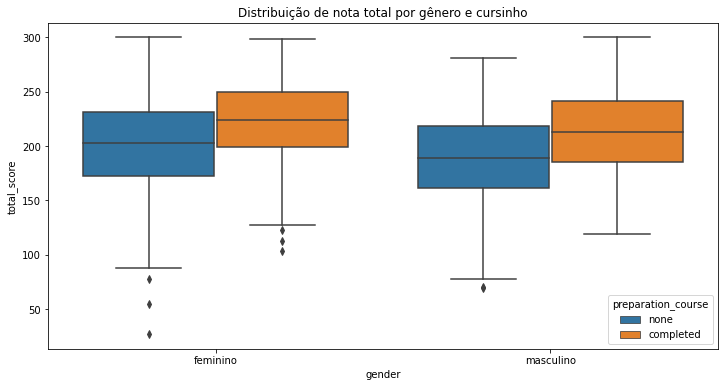

In [0]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['gender'], y=df['total_score'].astype(float), hue=df['preparation_course']).set(title='Distribuição de nota total por gênero e cursinho');

### Verificando a distribuição das notas por grupo racial e se fez cursinho ou não

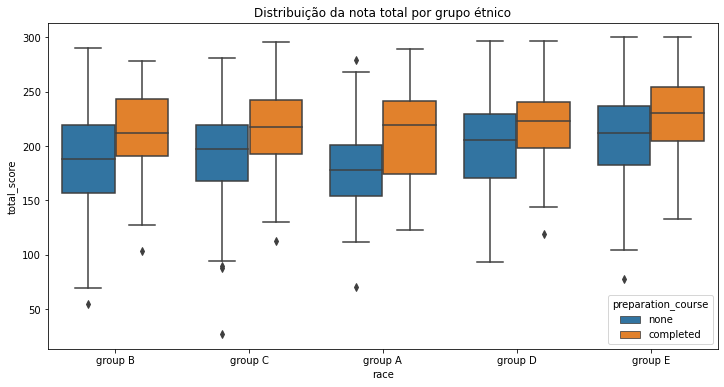

In [0]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['race'], y=df['total_score'].astype(float), hue=df['preparation_course']).set(title='Distribuição da nota total por grupo étnico');

### E se pegarmos a média da nota total por grupo étnico?

In [0]:
round(df.groupby(['race'])['total_score'].mean(),2)

Out[72]: race
group A    188.98
group B    196.41
group C    201.39
group D    207.54
group E    218.26
Name: total_score, dtype: float64

### E se obtermos agora a separação dos que fizeram ou não o cursinho

In [0]:
round(df.groupby(['race', 'preparation_course'])['total_score'].mean(),2).reset_index()

,race,preparation_course,total_score
0,group A,completed,210.19
1,group A,none,177.64
2,group B,completed,211.93
3,group B,none,187.75
4,group C,completed,215.61
5,group C,none,193.16
6,group D,completed,220.60
7,group D,none,201.59
8,group E,completed,230.08
9,group E,none,209.39


### E quanto a média das notas por gênero?

In [0]:
df.groupby('gender').mean()

,math_score,reading_score,writing_score,total_score
gender,,,,
feminino,63.633205,72.608108,72.467181,208.708494
masculino,68.728216,65.473029,63.311203,197.512448


### Como está a média por matéria quanto ao cursinho preparatório e a diferença

In [0]:
com_curso = pd.DataFrame(df[df['preparation_course'] == 'completed'].agg({'math_score':'mean', 'reading_score':'mean', 'writing_score':'mean'}), columns=['com_curso'])
sem_curso = pd.DataFrame(df[df['preparation_course'] == 'none'].agg({'math_score':'mean', 'reading_score':'mean', 'writing_score':'mean'}), columns=['sem_curso'])

df2 = pd.concat([sem_curso, com_curso], axis=1)
df2['diferenca'] = round(abs(df2['sem_curso'] - df2['com_curso']),1)

df2

,sem_curso,com_curso,diferenca
math_score,64.077882,69.695531,5.6
reading_score,66.534268,73.893855,7.4
writing_score,64.504673,74.418994,9.9


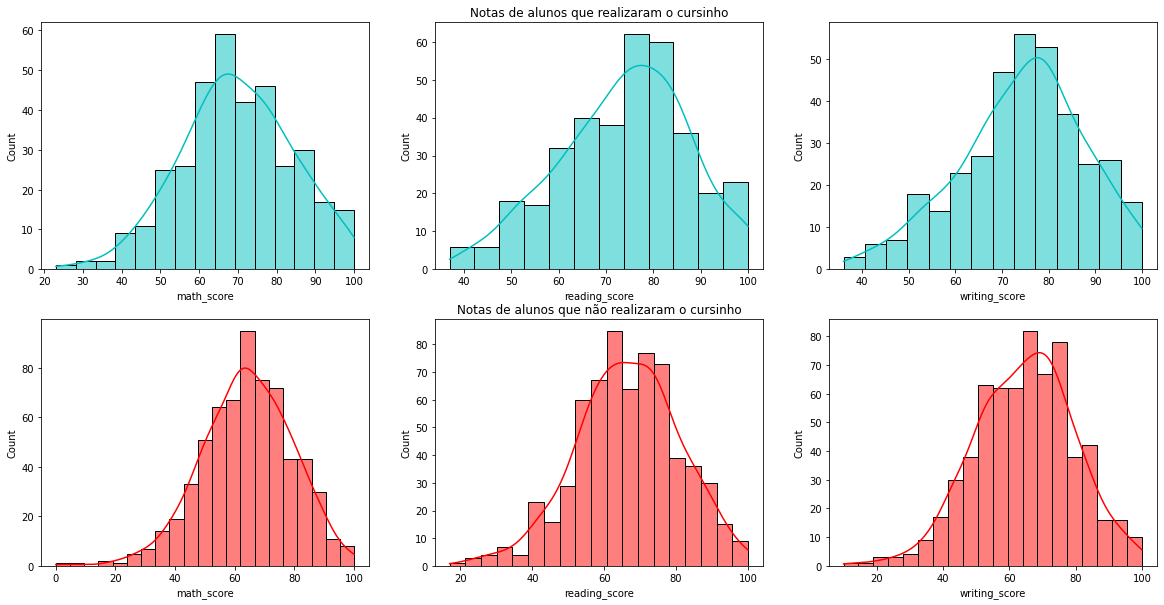

In [0]:
fig, axs = plt.subplots(nrows=2, ncols=3)
plt.gcf().set_size_inches(20, 10)

sns.histplot(df[df['preparation_course'] == 'completed']["math_score"], kde=True, ax=axs[0,0], color='c')
sns.histplot(df[df['preparation_course'] == 'completed']["reading_score"], kde=True, ax=axs[0,1], color='c').set(title='Notas de alunos que realizaram o cursinho')
sns.histplot(df[df['preparation_course'] == 'completed']["writing_score"], kde=True, ax=axs[0,2], color='c')

sns.histplot(df[df['preparation_course'] == 'none']["math_score"], kde=True, ax=axs[1,0], color='r')
sns.histplot(df[df['preparation_course'] == 'none']["reading_score"], kde=True, ax=axs[1,1], color='r').set(title='Notas de alunos que não realizaram o cursinho')
sns.histplot(df[df['preparation_course'] == 'none']["writing_score"], kde=True, ax=axs[1,2], color='r');

### Média da diferença

In [0]:
df2['diferenca'].mean()

Out[77]: 7.633333333333333

### Insigths:

1) Pessoas que fizeram cursos preparatórios apresentam uma diferença média 7,6 pontos a mais que os demais;

2) Foco em venda/promoções de cursos de matemática, pois essa é a área que apresenta as menores notas
	
3) Foco nos grupos A, B e C

4) Homens em média tem um score mais baixo, devido a leitura e escrita mais baixa